# 滑面识别文件

## 0 一些准备工作

### 0.1 导入相关库

In [1]:
# 导入需要的库
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import sklearn.metrics as sm
from skimage import io, measure, morphology
from sklearn.cluster import KMeans, MiniBatchKMeans
import copy
from PIL import Image, ImageChops
import time

import alphashape
# 导入需要的库
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn import metrics
from sklearn.cluster import DBSCAN


### 0.2 设置相关参数

In [26]:
# 位移文件所在目录
# # 文件 1
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\01_j1_55_15"
# sort_num = 1


# # 文件 2
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\02_j1_55_35"
# sort_num = 2


# # 文件 3
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\03_j1_55_55"
# sort_num = 3


# # 文件 4
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\04_j1_55_75"
# sort_num = 4


# # 文件 5
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\05_j2_35_15"
# sort_num = 5


# # 文件 6
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\06_j2_35_35"
# sort_num = 6


# # 文件 7
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\07_j2_35_55"
# sort_num = 7


# # 文件 8
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\08_j2_35_75"
# sort_num = 8


# # 文件 9
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\09_sd_30"
# sort_num = 9


# # 文件 10
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\10_sd_45"
# sort_num = 10


# # 文件 11
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\11_sd_60"
# sort_num = 11


# # 文件 12
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\12_sh_10"
# sort_num = 12


# # 文件 13
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\13_sh_20"
# sort_num = 13


# # 文件 14
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\14_sh_30"
# sort_num = 14

# # 文件 15
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\15_j1_55_45"
# sort_num = 1


# # 文件 16
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\16_j2_35_45"
# sort_num = 1


# # 文件 17
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\17_sd_15"
# sort_num = 17


# # 文件 18
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\9_discuss_model\18_sd_75"
# sort_num = 18

# # 文件 19
# image_path = r"D:\important_document\File\Slip_Surface_of_Jointed_Rock_Slope\19_homogeneous_slope_class"
# sort_num = 1


A_x_array, A_y_array = [600, 268, 268, 268, 600, 552, 534, 223, 223, 1088],  [1687, 1687, 1687, 1687, 1687, 1687, 1687, 1572, 1322, 1687]
B_x_array, B_y_array = [3262, 3595, 3595, 3595, 3262, 3311, 3329, 3640, 3640, 2775], [1687, 1687, 1687, 1687, 1687, 1687, 1687, 1572, 1322, 1687]
C_x_array, C_y_array = [3262, 3595, 3595, 3595, 3262, 3311, 3329, 3640, 3640, 2775], [90, 90, 90, 90, 90, 90, 90, 205, 455, 90]
D_x_array, D_y_array = [2198, 2839, 1865, 1302, 2198, 2149, 2131, 2423, 3060, 1621], [90, 90, 90, 90, 90, 90, 90, 205, 455, 90]
E_x_array, E_y_array = [867, 535, 534, 534, 867, 697, 634, 452, 370, 1354],  [1421, 1421, 1421, 1421, 1421, 1542, 1587, 1344, 1177, 1421]
F_x_array, F_y_array = [600, 268, 268, 268, 600, 552, 534, 223, 223, 1088],  [1421, 1421, 1421, 1421, 1421, 1542, 1587, 1344, 1177, 1421]



if 1 <= sort_num <= 8:
    i_ = 0
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 9:
    i_ = 7
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 10:
    i_ = 2
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 11:
    i_ = 3
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 12:
    i_ = 4
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 13:
    i_ = 5
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]
elif sort_num == 14:
    i_ = 6
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]

elif sort_num == 17:
    i_ = 8
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]

elif sort_num == 18:
    i_ = 9
    A_x, A_y = A_x_array[i_], A_y_array[i_]
    B_x, B_y = B_x_array[i_], B_y_array[i_]
    C_x, C_y = C_x_array[i_], C_y_array[i_]
    D_x, D_y = D_x_array[i_], D_y_array[i_]
    E_x, E_y = E_x_array[i_], E_y_array[i_]
    F_x, F_y = F_x_array[i_], F_y_array[i_]

# 保存的颜色为类似红色,其意义为只保存最接近该种颜色的颜色
keep_of_color = np.array([0, 0, 0]) / 255.0
# 其他颜色直接设置other_color
other_color = np.array([255, 255, 255]) / 255.0


## 1 滑块识别

### 1.1 使用图像分割识别包含其他块体的滑块

In [27]:
# 定义函数用于识别包含其他块体的滑块
def get_block_with_noise(imgae_path):
    filename_of_image = image_path + "\\" + "total_displacement.jpg"

    num_of_color = 2
    color_of_keep = np.array([0, 0, 0]) / 255.0
    other_color = np.array([255, 255, 255]) / 255.0

    # 读取图片并显示
    image = io.imread(filename_of_image)

    # 读取图片每个像素点的信息(RGB值)
    data = image / 255.0
    # print("pre_data: \n", data)
    data = data.reshape(-1, 3)
    # print("lat_data: \n", data)

    # 开始对图片中的像素进行聚类
    # 最要想要留下的颜色个数
    color_use = num_of_color
    # 开始进行聚类
    # km = MiniBatchKMeans(color_use)
    km = KMeans(init='k-means++', n_clusters=color_use, random_state=0)
    km.fit(data)
    # 利用np.array的整数索引，用聚类中心点值，代替原来点的值
    new_data = km.cluster_centers_[km.predict(data)]
    # 获取查看剩下的color_use 种颜色
    # print("new_data: \n", new_data)
    color_set = np.array(list(set([tuple(t) for t in new_data])))
    # print("color_set:\n", color_set)

    # 计算聚类后的每种颜色与保留色的距离
    dist = []
    for i in range(len(color_set)):
        dist.append(np.sqrt(np.sum(np.square(color_set[i] - color_of_keep))))

    # print("dist:\n", dist)

    # 获取距离最小的下标
    index_min = dist.index(min(dist))
    # print("index_min: ", index_min)

    # 将new_data中除最小下标所对应的值之外的值变为指定颜色
    for i in range(len(new_data)):
        if tuple(new_data[i]) != tuple(color_set[index_min]):
            new_data[i] = other_color
        else:
            # new_data[i] = np.array([0, 0, 0])
            new_data[i] = color_of_keep

    # 重新设置图片
    image_new = new_data.reshape(image.shape)
    image_new_convert = np.array(np.round(image_new * 255), dtype='uint8')
    save_name_of_image = image_path + "\\cluster_image.jpg"
    io.imsave(save_name_of_image, image_new_convert)


In [28]:
get_block_with_noise(image_path)

### 1.2 使用连通区域去除其他块体

In [29]:
# 定义一个函数，去除多余噪点
def remove_noise_block(image_path):
    save_name_of_image = image_path + "\\cluster_image.jpg"
    # 使用cv2读取图片
    image = cv2.imread(save_name_of_image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    opening = 255 - \
        cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    
    save_name_of_image = image_path + "\\cluster_image_without_noise.jpg"

    io.imsave(save_name_of_image, opening)

    # 再将图片反色 #
    im = Image.open(save_name_of_image)
    im_inverted = ImageChops.invert(im)
    im_inverted.save(save_name_of_image)

    # 对输入图像进行降噪，去除噪声干扰，然后再二值化 #
    # ----------- 第一个调试点, 用于出图 -----------# 出 反色之后的图
    im = cv2.imread(save_name_of_image)
    # print(im)
    blurred = cv2.GaussianBlur(im, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    t, binary = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # 将数组还原成图片 Image.fromarray方法 传入数组 和 通道
    img = Image.fromarray(binary)
    img.save(save_name_of_image)

    # 使用连通域阈值对图片进行去噪 #
    threshold = 35000  # ----------- 第二个调试点, 用于出图 -----------#
    # 读入图片
    img = cv2.imread(save_name_of_image, cv2.IMREAD_COLOR)
    GrayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 图片灰度化处理
    # 二值化图片
    ret, binary = cv2.threshold(GrayImage, 40, 255, cv2.THRESH_BINARY)
    # cv2.fingContours寻找图片轮廓信息
    """提取二值化后图片中的轮廓信息 ，返回值contours存储的即是图片中的轮廓信息，是一个向量，内每个元素保存
    了一组由连续的Point点构成的点的集合的向量，每一组Point点集就是一个轮廓，有多少轮廓，向量contours就有
    多少元素"""
    contours, hierarch = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])  # 计算轮廓所占面积
        if area < threshold:  # 将area小于阈值区域填充背景色，由于OpenCV读出的是BGR值
            # 原始图片背景BGR值(84,1,68)
            cv2.drawContours(img, [contours[i]], -1, (0, 0, 0), thickness=-1)
            continue

    # cv2.imshow('Output',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # 保存图片
    cv2.imwrite(save_name_of_image, img)

    # 在执行一次反色
    im = Image.open(save_name_of_image)
    im_inverted = ImageChops.invert(im)

    im_inverted.save(save_name_of_image)


In [30]:
remove_noise_block(image_path)

## 2 滑面识别

### 2.1 识别滑块边界

#### 2.1.1 使用alpha获取滑块边界

In [31]:
def get_black_point(image_file):
    # 打开图片文件
    img = Image.open(image_file).convert("RGB")
    array_of_image = np.asarray(img)
    black_point_array = []
    # print(array_of_image[0][0][0])

    for i in range(len(array_of_image)):
        for j in range(len(array_of_image[0])):
            if array_of_image[i][j][0] < 128:
                temp_point = [j, i]
                black_point_array.append(temp_point)
    # print(black_point_array[0])

    alpha_shape = alphashape.alphashape(black_point_array, 0.5)
    # print(alpha_shape)

    boundary_array = alpha_shape.exterior.coords[:]
    # print(shape(boundary_array))

    return boundary_array

### 2.2 去除滑块边界中边坡面部分

In [32]:
# 2. 利用边坡边界，去除大部分边坡边界
def get_init_slide(boundary_array):
    # print("boundary_array len is", len(boundary_array))
    slide_array = []
    for i in range(len(boundary_array)):
        k = (D_y - E_y) / (D_x - E_x)
        b = E_y - k * E_x
        x = boundary_array[i][0]
        y = boundary_array[i][1]
        error_range = 2
        if sort_num == 6 or sort_num == 7:
            error_range = 6        
        if (y - error_range) <= (k * x + b) <= (y + error_range):
            # print("({:4.1f}, {:4.1f})".format(x, y))
            continue
        if y - 1 <= D_y <= y + 1:
            # print("({:4.1f}, {:4.1f})".format(x, y))
            continue
        if (F_x <= x <= E_x) and (y - 1 <= F_y <= y + 1):
            continue

        slide_array.append(boundary_array[i])
    return slide_array


In [33]:
# 3. 定义去除滑面噪点的函数
def remove_noise_form_silde(slide_array):
    # 定义dbscan函数
    def dbscan_(data, r, min_samples):
        """实现DBSCAN算法

        Args:
            data (ndarray): 输入数据集
            r (float): 阈值半径
            min_samples (int): 点数阈值
        """
        db = DBSCAN(eps=r, min_samples=min_samples)
        clustering = db.fit(data)
        # 计算分簇
        labels = clustering.labels_.tolist()
        # 计算分簇数
        if -1 in labels:
            k = len(set(labels)) - 1
        else:
            k = len(set(labels))
        # # 计算轮廓系数
        # if k == 0:
        #     dbscan_score = 0
        # else:
        #     dbscan_score = metrics.silhouette_score(X=data, labels=labels)

        return labels
    result = dbscan_(slide_array, 10, 10)
    # print(result[0])

    slide_label = result
    print("set slide is ", set(slide_label))
    label_sum = [0 for i in range(len(set(slide_label)) - 1)]
    slide_array_db = []
    # # 获取除噪点之外最短的一组
    # for i_ in range(len(slide_array)):
    #     if slide_label[i_] == -1:
    #         continue
    #     label_sum[slide_label[i_]] += 1
    
    # min_num_of_label = min(label_sum)
    # index_min_label = label_sum.index(min_num_of_label)

    for i_ in range(len(slide_array)):        
        if slide_label[i_] == -1:  # or slide_array[i_] == index_min_label:
            continue
        slide_array_db.append(slide_array[i_])
    print("num_of_labels is ", label_sum)
    return slide_array_db


In [34]:
# 4. 对数组进行重新排序
def resort_slide(slide_array_w_noise):
    silde_left = []
    slide_right = []

    label = 1
    for i in range(1, len(slide_array_w_noise)):
        d = abs(slide_array_w_noise[i][1] - slide_array_w_noise[i - 1][1])
        if d >= 100:
            # print("ge")
            label = 0

        # print(label)
        if label == 0:
            silde_left.append(slide_array_w_noise[i])
        elif label == 1:
            slide_right.append(slide_array_w_noise[i])

    slide_array_resort = silde_left + slide_right

    slide_array = []

    return slide_array_resort


### 对排好序的进行识别距离，从而去除小段点

### 2.3 定义函数，获取滑动面

In [35]:
# 定义一个函数，获取单张图片的滑动面
def get_curve_of_slide(image_path):
    image_file = image_path + "\\cluster_image_without_noise.jpg"
    boundary_array = get_black_point(image_file=image_file)
    slide_array = get_init_slide(boundary_array=boundary_array)
    slide_array_w_noise = remove_noise_form_silde(slide_array=slide_array)
    slide_array_resort = resort_slide(slide_array_w_noise=slide_array_w_noise)
    x_of_slide = []
    y_of_slide = []
    for i_ in slide_array_resort:
        x_of_slide.append(i_[0])
        y_of_slide.append(i_[1])
    return x_of_slide, y_of_slide


In [36]:
x_i, y_i = get_curve_of_slide(image_path)
x_i_array = np.array(x_i)
y_i_array = np.array(y_i)
np.savetxt(image_path + "\\x_array.txt", x_i_array, fmt="%4d")
np.savetxt(image_path + "\\y_array.txt", y_i_array, fmt="%4d")


set slide is  {0, 1}
num_of_labels is  [0]


## 3 绘制滑动面
### 3.1 绘制单独的滑动面

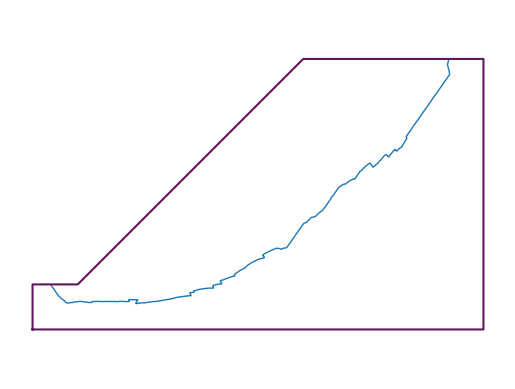

In [37]:
plt.axis('off')
plt.axis("equal")
# plt.xlim(-10, 2732)
# plt.ylim(-10, 1677)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
fig = plt.gcf()

max_y = max(A_y, B_y, C_y, D_y, E_y, F_y)
A_y_, B_y_, C_y_, D_y_, E_y_, F_y_ = max_y - A_y, max_y - B_y, max_y - C_y, max_y - D_y, max_y - E_y, max_y - F_y

plt.plot((A_x, B_x, C_x, D_x, E_x, F_x, A_x), (A_y_, B_y_, C_y_,
                                               D_y_, E_y_, F_y_, A_y_), linewidth=1.5, color="#621661", zorder=2)

y_i_ = []
for i in y_i:
    y_i_.append(max_y - i)
plt.plot(x_i, y_i_, linewidth=1, zorder=1)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
# plt.margins(0, 0)
fig.savefig(image_path + "\\slide_surface.pdf",
            format='pdf', dpi=1200, pad_inches=0, transparent=1)
plt.show()


### 3.2 将滑动面与总位移云图与最大剪切应变云图绘制到一起
#### 3.2.1 滑动面-最大剪切应变云图


In [67]:
maximum_shear_strain_image = image_path + "\\maximum_shear_strain.jpg"
# 为了避免每次都要重新运行上面的代码，这里选择从文件中读取x, y的数据
x_i = np.loadtxt(image_path + "\\x_array.txt", dtype=float)
y_i = np.loadtxt(image_path + "\\y_array.txt", dtype=float)

img = Image.open(maximum_shear_strain_image)
plt.figure("Image", figsize=(19.16, 8.65))  # 图像窗口名称
plt.imshow(img)
plt.plot(x_i, y_i, linewidth=3, color="red")
plt.savefig(image_path + "\\mss_slide.pdf",
            format='pdf', dpi=1200, pad_inches=0)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\important_document\\File\\Slip_Surface_of_Jointed_Rock_Slope\\9_discuss_model\\17_sd_15\\maximum_shear_strain.jpg'

#### 3.2.2 滑动面-总位移云图

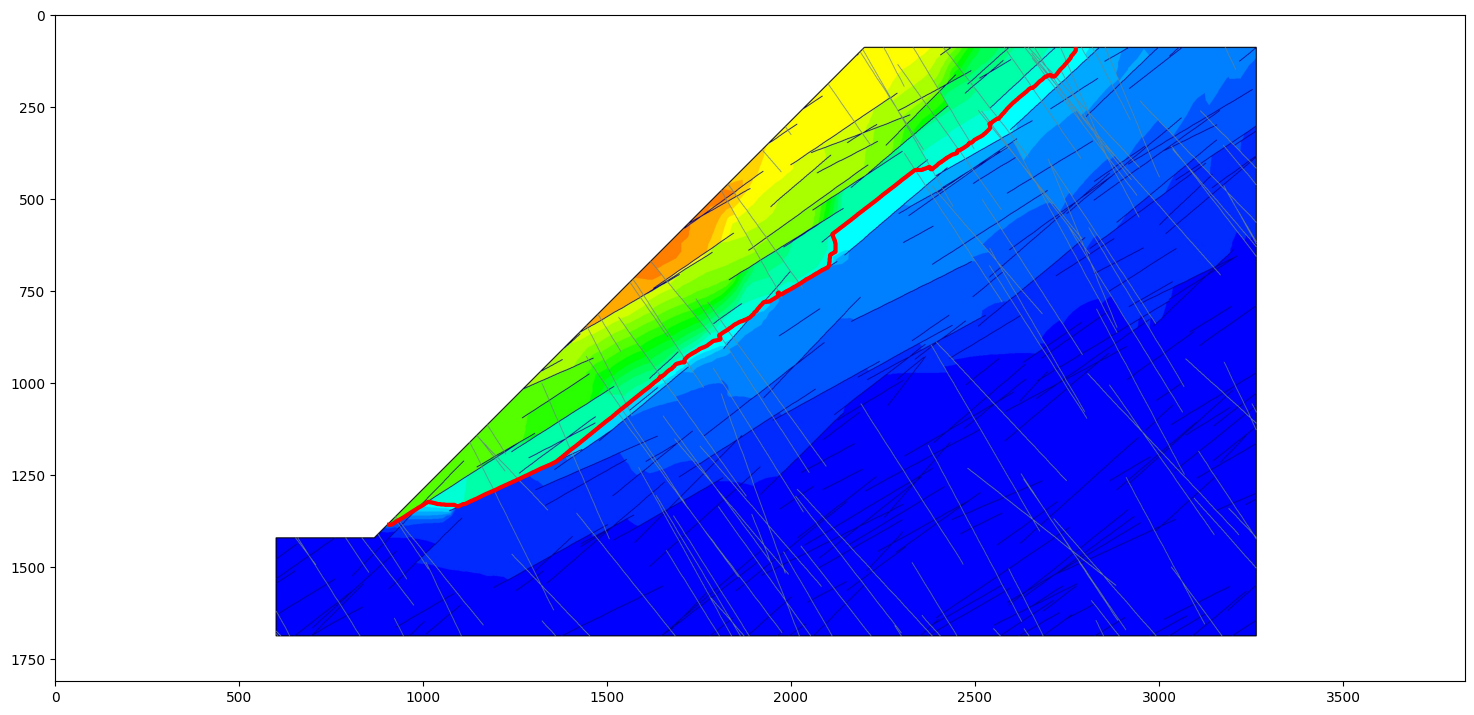

In [ ]:
total_displacement_image = image_path + "\\total_displacement_.jpg"
img = Image.open(total_displacement_image)
plt.figure("Image", figsize=(19.16, 8.65))  # 图像窗口名称
plt.imshow(img)
plt.plot(x_i, y_i, linewidth=3, color="red")
plt.savefig(image_path + "\\td_silde.pdf",
            format='pdf', dpi=1200, pad_inches=0)


# END